# Investigating the difference between fitspiration and thinspiration textual content on Twitter

# Introduction

The online trends of thinspiration and fitspiration have received much academic attention in the body image field. To illustrate the influence of both trends on people’s everyday life, a study asked participants to report their exposure to thinspiration and fitspiration content during a 1-week period (Griffiths & Stefanovski, 2019). Out of an average of 32.24 surveys that they completed, participants reported 4.8 times exposure to thinspiration, 6.2 times exposure to fitspiration, and 2.4 times dual exposure to both thinspiration and fitspiration. 

Experimental studies have confirmed the potential harms of exposure to both thinspiration and fitspiration content. Relative to viewing travel images (control groups), female participants who spend time browsing thinspiration or fitspiration images experience a greater tendency to engage in appearance comparisons and reduced state body satisfaction (Dignard & Jarry, 2021).

Though seemingly having different focuses, past content analyses show that thinspiration and fitspiration content is thematically similar. Existing content analyses found both thinspiration and fitspiration posts on Social Networking Sites (SNS) focus on physical appearance and eating restraints (Alberga et al., 2018; Boepple & Thompson, 2016), while thinspiration focuses more on weight loss and eating disorders than fitspiration ones. Most past analyses are hand-coded with a limited number of samples. The only computational content analysis that I know of dates back to five years ago (Tiggemann et al., 2018), which found both trends to emphasize appearance and weight loss while fitspiration tweets exhibit significantly more positive sentiment than thinspiration ones. In view of the drifting characteristics of SNSs, the results may not be valid for today’s cultural landscape. The gap in knowledge calls for this research project.

In this project, I aim to use computational methods to explore how different thinspiration and fitspiration English-language tweets are in terms of sentiment, word use, and themes. My research questions are: How different are concurrent hashtags? How different are the captions in terms of sentiment, themes, presence of weight monitoring, dietary restraints, physical exercise, physical appearance, eating disorders, health maintenance, and promotional content in fitspiration and thinspiration tweets?

Similar to existing content analysis  (e.g., Alberga et al., 2018), this project searched the hashtags #fitspiration and #fitspo to sample fitspiration tweets and #thinspiration and #thinspo for thinspiration ones. Hashtag searches were performed over a two-week period on Twitter.

**Identifying the sign relations**

In the Peircean language, the sign-vehicle are the hashtags, i.e., “#fitspiration” or “#fitspo”, and “#thinspiration” or “#thinspo.” The sign-vehicle has the indexical object of the SNS posts with such hashtags, i.e., the samples in this project. The dicent interpretant is people expressing their drives to be “fit” or thin on SNS, while “fit” can be interpreted differently in the argument. The argumentative interpretant is the research subject here.

Based on the findings of past content analyses, I have the following hypotheses about the arguments:
H1: Fitspiration captions are significantly more positive in sentiment than thinspiration captions.
H2: Thinspiration tweets are more focused on eating disorders than fitspiration ones.
H3: Both fitspiration and thinspiration tweets show focuses on appearance and weight monitoring.

**Why the signs belong to a conventionalized pattern**

The signs I am studying belong to a conventionalized pattern because fitspiration and thinspiration SNS content has shared themes that are identified in multiple studies  (e.g., Alberga et al., 2018; Boepple & Thompson, 2016). Also, consumers of fitspiration and thinspiration content generate similar reactions—lowered body satisfaction among other detrimental effects  (Dignard & Jarry, 2021). In this project, by “culture” I mean the sentiment, frequently used words, and shared themes across tweets posted by different individuals under the hood of fitspiration or thinspiration. I aim to identify the patterns within fitspiration and thinspiration content and compare the patterns across these two groups.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tweepy       # access Twitter API
import config       # dict containing my credentials
import pandas as pd
import utils        # containing helper functions
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import scipy.stats as stats
import numpy as np
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import nltk
nltk.download('tagsets', quiet=True) 

True

# Data collection

In [ ]:
client = tweepy.Client(bearer_token=config.credentials['bearer_token'])

In [ ]:
# build a query for #fitspo/#fitspiration and #thinspo/thinspiration
# ref: https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#build

query_fit = "(#fitspo OR #fitspiration) -is:retweet lang:en"
query_thin = "(#thinspo OR #thinspiration) -is:retweet lang:en"

In [ ]:
# search tweets from the last seven days
tweets_fit = client.search_recent_tweets(query=query_fit,
                                     tweet_fields=['created_at'],
                                     expansions=['author_id'],
                                     max_results=100)
tweets_thin = client.search_recent_tweets(query=query_thin,
                                     tweet_fields=['created_at'],
                                     expansions=['author_id'],
                                     max_results=100)        

In [9]:
df_fit_scrape = pd.DataFrame(tweets_fit.data) 
df_fit_scrape.head()

,author_id,created_at,edit_history_tweet_ids,id,text
0,1088058234,2022-12-08 23:10:10+00:00,[1600991153603706880],1600991153603706880,Have a look at some of our most popular garmen...
1,742795886825213952,2022-12-08 22:43:44+00:00,[1600984501949452288],1600984501949452288,A celeb stylist taught me a blow dry technique...
2,705040642179727361,2022-12-08 22:20:06+00:00,[1600978553805459463],1600978553805459463,#FitSpo No Pain - No Gain! Get you some #Fitfa...
3,1541092355217973249,2022-12-08 21:37:28+00:00,[1600967823144415234],1600967823144415234,Link in bio ❤️🛒🌠 \n#fitness #love #motivation ...
4,127533587,2022-12-08 21:20:02+00:00,[1600963436615290893],1600963436615290893,Shades of black and gray.\n.\n@jlwilz. Richmon...


In [10]:
df_thin_scrape = pd.DataFrame(tweets_thin.data)
df_thin_scrape.head()

,author_id,created_at,edit_history_tweet_ids,id,text
0,1595028038537846786,2022-12-08 23:09:50+00:00,[1600991071139688448],1600991071139688448,❧ images i use for thinspo: a THREAD 🧵 \n\ni w...
1,1591887450443587584,2022-12-08 22:37:33+00:00,[1600982943408660480],1600982943408660480,i dropped alot of weight i was at like 130 pou...
2,1600968196890173440,2022-12-08 22:34:34+00:00,[1600982195971444736],1600982195971444736,"Hi I’m Clair, looking for moots 🖤\n•22 \n•ed/s..."
3,1099219299548491776,2022-12-08 22:29:33+00:00,[1600980929597829120],1600980929597829120,i lovee them #thinspo https://t.co/APdDiSl7i4
4,1496600928702640134,2022-12-08 21:54:40+00:00,[1600972154513678336],1600972154513678336,suck my skinny balls😀#edtwtdiet #edtwt #thinspo


In [11]:
# save the initial datasets to the local
# df_fit_scrape.to_csv('data/fitspo.csv')
# df_thin_scrape.to_csv('data/thinspo.csv')

In [12]:
# append new scraping results to the existing csv file
df_fit_scrape.to_csv('data/fitspo.csv', mode='a', index=True, header=False)
df_thin_scrape.to_csv('data/thinspo.csv', mode='a', index=True, header=False)

# Data analysis

In [3]:
df_fitspo = pd.read_csv('data/fitspo.csv', index_col=0)
df_thinspo = pd.read_csv('data/thinspo.csv', index_col=0)

In [4]:
# preprocess the data by removing the mentions, links, and emojis,
# isolating the hashtags as an individual column,
# and removing duplicates of captions
df_fitspo = df_fitspo.drop_duplicates(subset=["text"], keep='first') \
                     .sort_values(by=["created_at"]) \
                     .reset_index(drop=True)

utils.clean_tweet_texts(df_fitspo)
df_fitspo.tail()

The sample contains 389 posts from 2022-11-28 11:37:13+00:00 to 2022-12-08 23:10:10+00:00.


,author_id,created_at,edit_history_tweet_ids,id,text,hashtags,text_clean
384,1492968633152286723,2022-12-08 21:00:01+00:00,[1600958397867642880],1600958397867642880,The exotic ingredients in the composition of E...,#exipure #weightloss #supplements #fitspiratio...,The exotic ingredients in the composition of E...
385,127533587,2022-12-08 21:20:02+00:00,[1600963436615290893],1600963436615290893,Shades of black and gray.\n.\n@jlwilz. Richmon...,#lingerie #boudoir #underwear #rva #richmondva...,Shades of black and gray. . Richmond. November...
386,1541092355217973249,2022-12-08 21:37:28+00:00,[1600967823144415234],1600967823144415234,Link in bio ❤️🛒🌠 \n#fitness #love #motivation ...,#fitness #love #motivation #travel #workout #f...,Link in bio
387,742795886825213952,2022-12-08 22:43:44+00:00,[1600984501949452288],1600984501949452288,A celeb stylist taught me a blow dry technique...,#fitnessjourney #fitspiration #body,A celeb stylist taught me a blow dry technique...
388,1088058234,2022-12-08 23:10:10+00:00,[1600991153603706880],1600991153603706880,Have a look at some of our most popular garmen...,#supacore #fitspo #sports #athlete #sportsinju...,Have a look at some of our most popular garmen...


In [5]:
df_thinspo = df_thinspo.drop_duplicates(subset=["text"], keep='first') \
                       .sort_values(by=["created_at"]) \
                       .reset_index(drop=True)

utils.clean_tweet_texts(df_thinspo)   
df_thinspo.tail()

The sample contains 387 posts from 2022-11-27 04:31:45+00:00 to 2022-12-08 23:09:50+00:00.


,author_id,created_at,edit_history_tweet_ids,id,text,hashtags,text_clean
382,1496600928702640134,2022-12-08 21:54:40+00:00,[1600972154513678336],1600972154513678336,suck my skinny balls😀#edtwtdiet #edtwt #thinspo,#edtwtdiet #edtwt #thinspo,suck my skinny balls
383,1099219299548491776,2022-12-08 22:29:33+00:00,[1600980929597829120],1600980929597829120,i lovee them #thinspo https://t.co/APdDiSl7i4,#thinspo,i lovee them
384,1600968196890173440,2022-12-08 22:34:34+00:00,[1600982195971444736],1600982195971444736,"Hi I’m Clair, looking for moots 🖤\n•22 \n•ed/s...",#edtwt #shtwt #thinspo,"Hi I’m Clair, looking for moots •22 •ed/sh/thi..."
385,1591887450443587584,2022-12-08 22:37:33+00:00,[1600982943408660480],1600982943408660480,i dropped alot of weight i was at like 130 pou...,#edtwt #thinspo #nsfwtwtًً #nsfwtw,i dropped alot of weight i was at like 130 pou...
386,1595028038537846786,2022-12-08 23:09:50+00:00,[1600991071139688448],1600991071139688448,❧ images i use for thinspo: a THREAD 🧵 \n\ni w...,#edtwt #ed #cals #thinspo #thread,❧ images i use for thinspo: a THREAD i will up...


After deleting duplicates with the same captions—keeping only the first one, the final sample consists of 389 fitspiration tweets and 387 thinspiration tweets from November 27 to December 8 in 2022.

In [6]:
# only perform analysis on the text_clean and hashtags columns
df_fit_text = df_fitspo.loc[:, ["text_clean", "hashtags"]]
df_thin_text = df_thinspo.loc[:, ["text_clean", "hashtags"]]

## Sentiment analysis on captions

In [17]:
sid = SentimentIntensityAnalyzer()

# return the compound sentiment score (int)
def sentiment_score(text):
    return sid.polarity_scores(text)['compound']

Ttest_indResult(statistic=5.820892743406678, pvalue=8.57218753286415e-09)
Fitspiration sentiment mean: 0.23122493573264763
Thinspiration sentiment mean: 0.06593462532299746


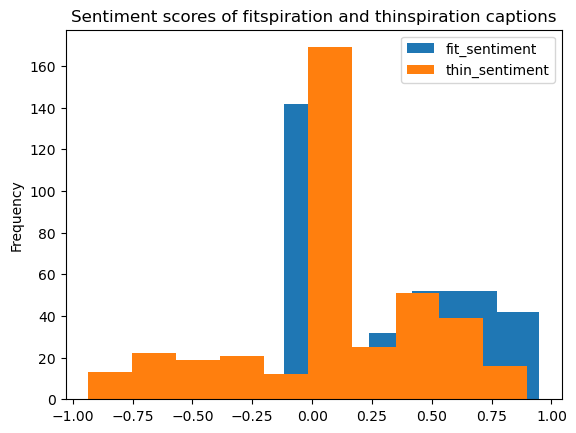

In [18]:
df_fit_text['fit_sentiment'] = df_fit_text['text_clean'].apply(sentiment_score)
df_thin_text['thin_sentiment'] = df_thin_text['text_clean'].apply(sentiment_score)

# plots histogram
df_fit_text['fit_sentiment'].plot(kind="hist", title="Sentiment scores of fitspiration and thinspiration captions", legend=True)
df_thin_text['thin_sentiment'].plot(kind="hist", title="Sentiment scores of fitspiration and thinspiration captions", legend=True)

# ttest
ttest = stats.ttest_ind(df_fit_text['fit_sentiment'], df_thin_text['thin_sentiment'])
print(ttest)
print("Fitspiration sentiment mean:", f"{df_fit_text['fit_sentiment'].mean()}")
print("Thinspiration sentiment mean:", f"{df_thin_text['thin_sentiment'].mean()}")

In [20]:
# selects the positive sentiment samples
fit_pos_sentiment = df_fit_text[df_fit_text['fit_sentiment'] > 0]['fit_sentiment']
thin_pos_sentiment = df_thin_text[df_thin_text['thin_sentiment'] > 0]['thin_sentiment']

ttest = stats.ttest_ind(fit_pos_sentiment, thin_pos_sentiment)
print(ttest)
print("Fitspiration positive sentiment mean:", f"{fit_pos_sentiment.mean()}")
print("Thinspiration positive sentiment mean:", f"{thin_pos_sentiment.mean()}")

Ttest_indResult(statistic=2.8733714801468064, pvalue=0.00431270323427246)
Fitspiration positive sentiment mean: 0.5413926108374378
Thinspiration positive sentiment mean: 0.47132430555555527


## Word frequency analysis

In [9]:
# tags all the words
utils.pos_tagged_full(df_fit_text['hashtags'])[:5]
utils.pos_tagged_full(df_thin_text['hashtags'])[:5]

[('edtwt', 'NN'),
 ('thinspotwt', 'NN'),
 ('thinspo', 'NN'),
 ('fatspo', 'NN'),
 ('edtwt', 'NN')]

Plotting the most frequently used hashtags

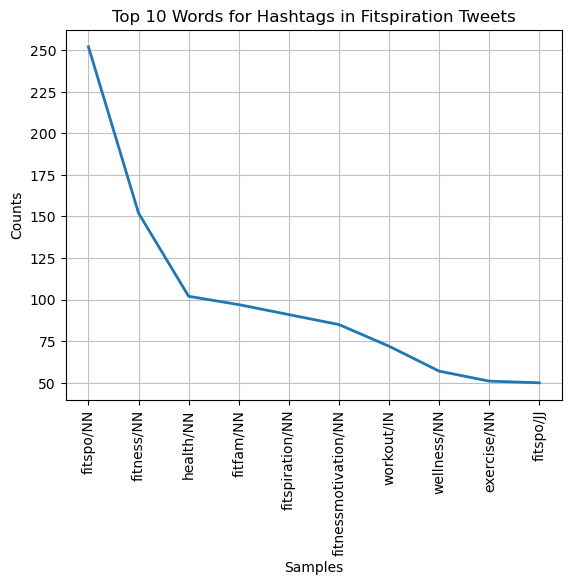

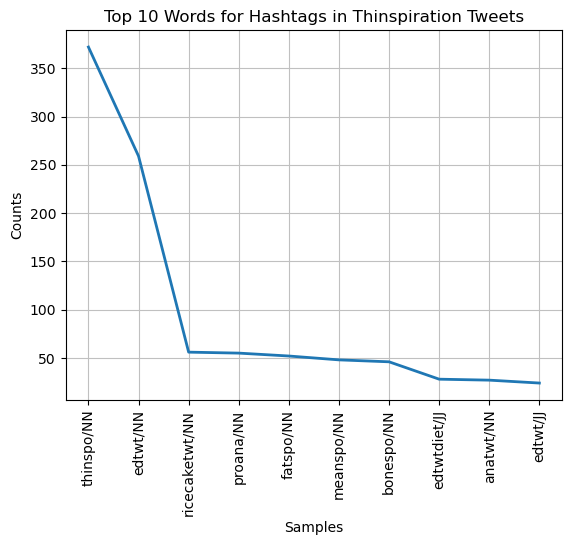

In [10]:
utils.plot_top_words(df_fit_text['hashtags'], data_description=
                                    'Hashtags in Fitspiration Tweets', n=10)
utils.plot_top_words(df_thin_text['hashtags'], data_description=
                                    'Hashtags in Thinspiration Tweets', n=10)

Plotting the most frequentely used nouns in the captions

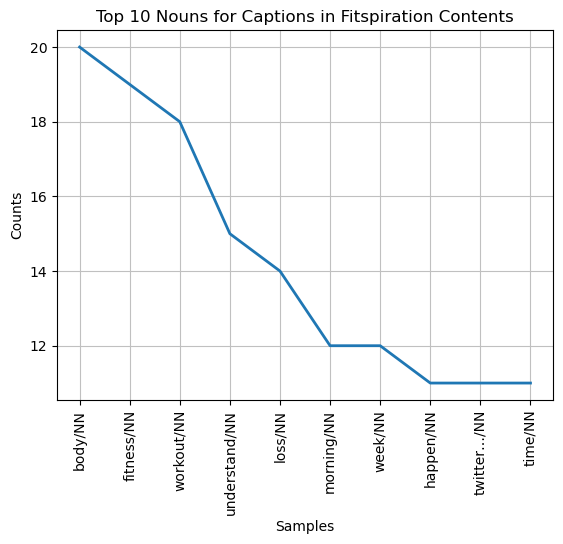

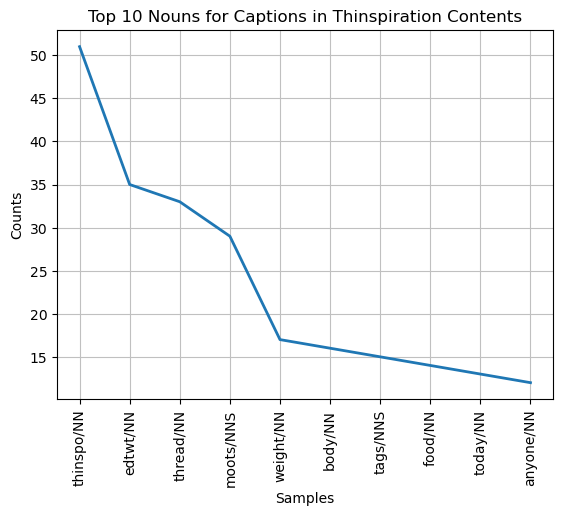

In [12]:
utils.plot_top_n(df_fit_text['text_clean'], data_description=
                                    'Captions in Fitspiration Contents', n=10)
utils.plot_top_n(df_thin_text['text_clean'], data_description=
                                    'Captions in Thinspiration Contents', n=10)

## TF-IDF analysis on captions

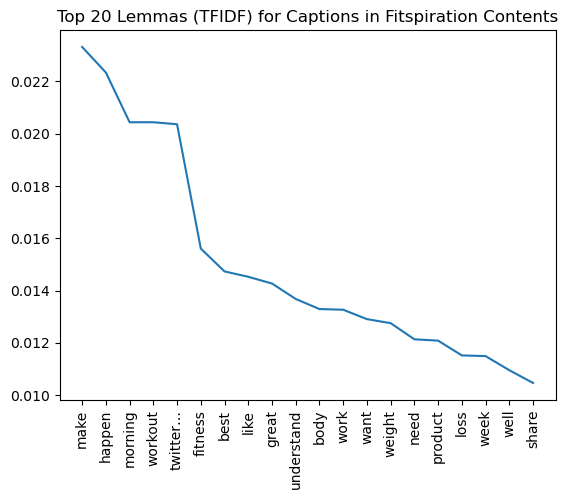

In [14]:
utils.plot_top_tfidf(df_fit_text['text_clean'], 'Captions in Fitspiration Contents')

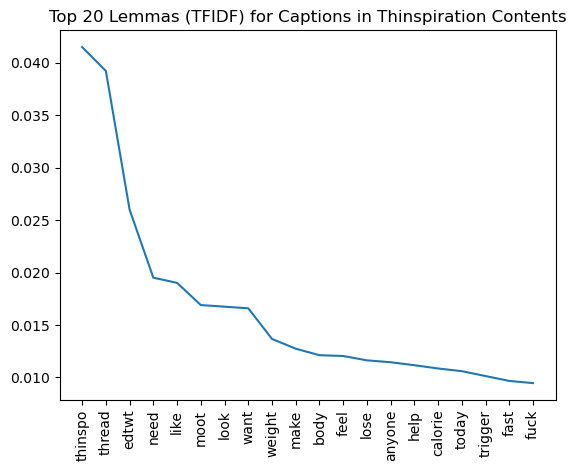

In [15]:
utils.plot_top_tfidf(df_thin_text['text_clean'], 'Captions in Thinspiration Contents')

## Latent Dirichlet allocation (LDA) Approach

This project uses hashtag-based tweet pooling to improve the performance of LDA on shorter texts like tweets (Mehrotra et al., 2013).

Specifically, I created pseudo documents for each hashtag by concatenating the captions of the tweets posted with the hashtag. One tweet can be added to multiple documents if posted with multiple hashtags (Mehrotra et al., 2013, p. 890). Only hashtags with 5 and above tweets are selected.

In [7]:
# initiates a dataframe
df_lda_fit = pd.DataFrame(columns=["hashtag", "tweets_concatenated"])

# maps the fitspiration hashtags to the number of tweets with the hashtag
fit_ht_dict = {}
for h_lst in df_fit_text["hashtags"].str.split():
    for h in h_lst:
        fit_ht_dict[h] = fit_ht_dict.get(h, 0) + 1

# add rows in df_lda_fit with index being individual hashtags
for ht, count in fit_ht_dict.items():
    if count >= 5:
        new_row = [ht, df_fit_text.loc[df_fit_text["hashtags"] > ht] \
                                                  ["text_clean"].str.cat()]
        df_lda_fit.loc[len(df_lda_fit.index)] = new_row

print(df_lda_fit.shape)
pd.options.display.max_colwidth = 300
df_lda_fit.head()

(144, 2)


,hashtag,tweets_concatenated
0,#fitspo,The place YOU ARE IN needs YOU TODAY.Let’s make fit happen!Morning twitter…Advanced Exercise of the Month: Take your clamshells to the next level by increasing the difficulty in core stabilization. Don't forget to maintain a neutral (natural) spine alignment.Mindful meditation has been discovere...
1,#fitspiration,The place YOU ARE IN needs YOU TODAY.Let’s make fit happen!Morning twitter…Advanced Exercise of the Month: Take your clamshells to the next level by increasing the difficulty in core stabilization. Don't forget to maintain a neutral (natural) spine alignment.Mindful meditation has been discovere...
2,#fitnessmotivation,"The place YOU ARE IN needs YOU TODAY.Like and Subscribe for more of the best of fitness, finance and funLike and Subscribe for more of the best of fitness, finance and funLet’s make fit happen!Fitness is also a daily routine, including recovery after exercise, rest, and proper nutrition, that is..."
3,#fitness,"The place YOU ARE IN needs YOU TODAY.Like and Subscribe for more of the best of fitness, finance and funLike and Subscribe for more of the best of fitness, finance and funWith pain does come pleasure. Keep goingLet’s make fit happen!Fitness is also a daily routine, including recovery after exerc..."
4,#fitfam,"The place YOU ARE IN needs YOU TODAY.Like and Subscribe for more of the best of fitness, finance and funLike and Subscribe for more of the best of fitness, finance and funWith pain does come pleasure. Keep goingLet’s make fit happen!Fitness is also a daily routine, including recovery after exerc..."


In [8]:
# repete the above steps for thinspiration content
df_lda_thin = utils.hashtag_pooling_lda(df_thin_text)

print(df_lda_thin.shape)
pd.options.display.max_colwidth = 300
df_lda_thin.head() 

(45, 2)


,hashtag,tweets_concatenated
0,#edtwt,funny how some girls go from being bulimic to anorexic. like they gotta purge to get a tiny body den stop eating to keep that tiny body.ur type tiny girls or girls ?☆Neckfrom n3w weight loss. I randomly saw a clip of her pre-debut singing. I didn't recognize her at first until I saw the caption....
1,#thinspo,☆Neck(idfk what else to add lol)my top 4 fav pics atm ☆To be a womanshould i eat two pieces of cereal (30kjs) for breakfast tomorrow or keep fasting?This wonderful piece of art is titled “anorexia before after”i’m starting my journey from today and i just wanted to ask do you lose weight when ur...
2,#fatspo,☆Neckfrom n3w weight loss. I randomly saw a clip of her pre-debut singing. I didn't recognize her at first until I saw the caption.(idfk what else to add lol)Pure th1nsp0 thread .my top 4 fav pics atm ☆To be a womansome pinterest to keep u n me motivated during the holiday season &lt;3should i e...
3,#ed,funny how some girls go from being bulimic to anorexic. like they gotta purge to get a tiny body den stop eating to keep that tiny body.ur type tiny girls or girls ?☆Neckfrom n3w weight loss. I randomly saw a clip of her pre-debut singing. I didn't recognize her at first until I saw the caption....
4,#bodycheck,funny how some girls go from being bulimic to anorexic. like they gotta purge to get a tiny body den stop eating to keep that tiny body.ur type tiny girls or girls ?☆Neckfrom n3w weight loss. I randomly saw a clip of her pre-debut singing. I didn't recognize her at first until I saw the caption....


In [18]:
lemmas = df_lda_fit['tweets_concatenated'].apply(utils.get_lemmas)
lemmas.to_pickle('data/fit_lemmas.pkl')

In [19]:
lemmas = df_lda_thin['tweets_concatenated'].apply(utils.get_lemmas)
lemmas.to_pickle('data/thin_lemmas.pkl')

In [9]:
lemmas_fit = pd.read_pickle('data/fit_lemmas.pkl')
lemmas_fit = utils.make_bigrams(lemmas_fit)
lemmas_fit[0][:5]

['place', 'need', 'today.let', 'make', 'happen']

In [10]:
lemmas_thin = pd.read_pickle('data/thin_lemmas.pkl')
lemmas_thin = utils.make_bigrams(lemmas_thin)
lemmas_thin[0][:5]

['funny', 'girl_bulimic', 'anorexic', 'like', 'purge_tiny']

In [11]:
# initialize series of lemmas as Gensim Dictionary
dictionary_fit = corpora.Dictionary(lemmas_fit)
# convert dictionary into list of (token_id, token_count) tuples
bow_corpus_fit = [dictionary_fit.doc2bow(text) for text in lemmas_fit]

In [12]:
# initialize series of lemmas as Gensim Dictionary
dictionary_thin = corpora.Dictionary(lemmas_thin)
# convert dictionary into list of (token_id, token_count) tuples
bow_corpus_thin = [dictionary_fit.doc2bow(text) for text in lemmas_thin]

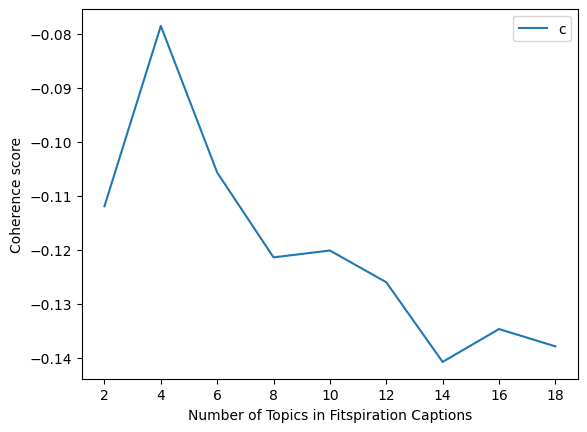

In [33]:
# ran multiple times
# when the number of topis is 4
# the model consistently reaches the best coherence score

model_list, coherence_values = utils.compute_coherence_values(dictionary=dictionary_fit,
                                                              corpus=bow_corpus_fit,
                                                              texts=lemmas_fit,
                                                              start=2,
                                                              limit=20,
                                                              step=2)
plt.plot(range(2, 20, 2), coherence_values)
plt.xlabel("Number of Topics in Fitspiration Captions")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

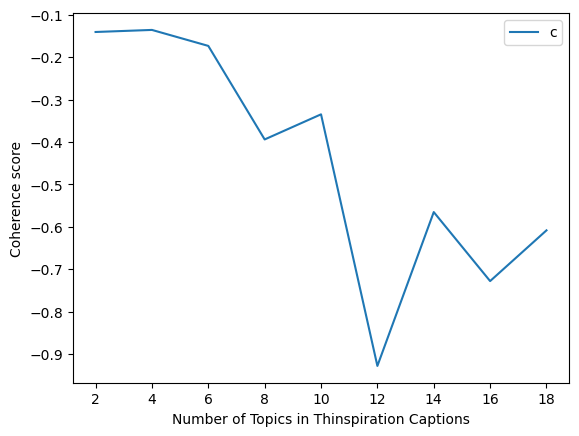

In [31]:
# ran multiple times
# when the number of topis is 4
# the model consistently reaches the best coherence score

model_list, coherence_values = utils.compute_coherence_values(dictionary=dictionary_thin,
                                                              corpus=bow_corpus_thin,
                                                              texts=lemmas_thin,
                                                              start=2,
                                                              limit=20,
                                                              step=2)
plt.plot(range(2, 20, 2), coherence_values)
plt.xlabel("Number of Topics in Thinspiration Captions")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best');

In [34]:
ldamodel_fit = models.ldamodel.LdaModel(bow_corpus_fit, num_topics = 4, id2word=dictionary_fit, passes=20, iterations=400)
ldamodel_fit.save('lda5p20_i400_fit.model')

In [35]:
ldamodel_thin = models.ldamodel.LdaModel(bow_corpus_thin, num_topics = 4, id2word=dictionary_thin, passes=20, iterations=400)
ldamodel_thin.save('lda5p20_i400_thin.model')

In [13]:
ldamodel_fit = models.ldamodel.LdaModel.load('lda5p20_i400_fit.model')
topics_fit = ldamodel_fit.print_topics(num_words=20)

In [14]:
ldamodel_thin = models.ldamodel.LdaModel.load('lda5p20_i400_thin.model')
topics_thin = ldamodel_thin.print_topics(num_words=20)

In [40]:
pyLDAvis.enable_notebook()
p_fit = pyLDAvis.gensim_models.prepare(ldamodel_fit, bow_corpus_fit, dictionary_fit)
p_fit

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.065147  0.097972       1        1  45.930158
0      0.125383  0.018496       2        1  29.530480
3     -0.191095  0.045058       3        1  23.952055
1      0.000565 -0.161525       4        1   0.587308, topic_info=      Term         Freq        Total Category  logprob  loglift
344   time  1024.000000  1024.000000  Default  30.0000  30.0000
204   like   581.000000   581.000000  Default  29.0000  29.0000
139  great   732.000000   732.000000  Default  28.0000  28.0000
290  shine   397.000000   397.000000  Default  27.0000  27.0000
45    body  1249.000000  1249.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
125   free     5.065073   571.057323   Topic4  -4.5601   0.4123
62   check     4.771787   366.330750   Topic4  -4.6197   0.7966
236  music     4.277394   161.947592   Topic4  -4.7291   1.5034
137   good     4.275667   228.372928   Topic4  -4.7295   1.1593
340  think     4.276515   285.821232   Topic4  -4.7293   0.9351

[309 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1033      4  0.726412  .accountability
911       3  0.994266             .let
887       4  0.764602            .need
4         1  0.315591         .nothing
4         2  0.129105         .nothing
...     ...       ...              ...
1032      4  0.468658          •ladies
651       3  0.983461             •let
910       1  0.533108             •sex
577       1  0.985594  •sex_appealaces
1300      4  0.660206            •stay

[427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [41]:
pyLDAvis.enable_notebook()
p_fit = pyLDAvis.gensim_models.prepare(ldamodel_thin, bow_corpus_thin, dictionary_thin)
p_fit

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.389900 -0.000002       1        1  99.677658
3      0.130459 -0.001429       2        1   0.122501
1      0.129720  0.000715       3        1   0.099920
0      0.129720  0.000715       4        1   0.099920, topic_info=                        Term       Freq       Total Category  logprob  loglift
1298                    ℊ𝒾𝓇𝓁  76.000000   76.000000  Default   30.000  30.0000
1132           well_probably  73.000000   73.000000  Default   29.000  29.0000
985             𝑤𝑖𝑡ℎ_𝑝𝑜𝑠𝑡𝑖𝑛𝑔  79.000000   79.000000  Default   28.000  28.0000
1145           anorexia_srry  80.000000   80.000000  Default   27.000  27.0000
1141               31.3_hate  80.000000   80.000000  Default   26.000  26.0000
...                      ...        ...         ...      ...      ...      ...
524               meal_fosho   0.008331   39.956276   Topic4   -7.192  -1.5670
465   kill_me.neuroscientist   0.008331   69.965004   Topic4   -7.192  -2.1272
1190  accountability_threada   0.008331   88.357424   Topic4   -7.192  -2.3606
40                 47kg_even   0.008331   60.284768   Topic4   -7.192  -1.9783
382              give_credit   0.008331  149.342877   Topic4   -7.192  -2.8855

[239 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
1187      1  0.809823            /1.87m_adult
29        1  1.000943            208cal_••end
1141      1  1.004797               31.3_hate
40        1  0.995276               47kg_even
45        1  1.001542        50cal_cornflakes
62        1  0.997931            account_50kg
1190      1  0.995955  accountability_threada
1145      1  1.004797           anorexia_srry
137       1  0.998942         believe_57-year
160       1  0.997011              body_bunch
193       1  1.001753            careful_salt
204       1  0.999735           chicken_salad
216       1  1.000312     collarbonesit_early
239       1  1.000705           cute_onlooker
1261      1  0.998942               eating.do
1265      1  0.994023                everyday
340       1  1.000885      first_caption.this
344       1  1.001850             flavor_istg
345       1  0.999419                  follow
1211      1  1.003916       for86_actuallylow
361       1  0.999594             friend_list
363       1  0.997003         friend_reachnot
369       1  0.994023             fuck_throat
372       1  0.999404        full.edtwt_think
373       1  0.996907                   funny
382       1  0.997704             give_credit
1241      1  0.995909                  goalsi
385       1  1.005724            good_morning
446       1  0.999477     interaction_someone
465       1  1.000500  kill_me.neuroscientist
478       1  1.000577            less_mundane
524       1  1.001094              meal_fosho
530       1  0.991979         meanspo_mooties
538       1  0.999125                   might
1230      1  0.998610                 muchlow
598       1  1.020230         outpatient_soon
632       1  1.007815        planning_binging
1174      1  0.999588                   psome
677       1  1.002889                remember
707       1  1.000282          season_3should
834       1  1.001094          tiddies_pierce
1181      1  1.001850     unfortunately_since
893       1  0.999932               wait_call
1132      1  1.002206           well_probably
1183      1  0.809823      whataburger_theyre
927       1  0.994694               work_hard
940       1  0.994023             ||tw_little
942       1  1.001094           ~shes_tinyugh
946       1  1.002416               ༚༅༚˳_₊˚★﹟
1298      1  1.003373                    ℊ𝒾𝓇𝓁
961       1  0.999369             ♡flashybonz
972       1  1.001094                 ⨾recent
985       1  1.004454            𝑤𝑖𝑡ℎ_𝑝𝑜𝑠𝑡𝑖𝑛𝑔, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [15]:
# saves the topn tweets for each topic in a text file
# for further analysis

top_fit_texts = utils.top_tweets_by_topic('data/top_fit_texts.txt', df_lda_fit, ldamodel_fit, bow_corpus_fit, ntop=5)

top_thin_texts = utils.top_tweets_by_topic('data/top_thin_texts.txt', df_lda_thin, ldamodel_thin, bow_corpus_thin, ntop=5)

## Using my built dictionary to test the difference of different focus

In [42]:
def ttest_focus(category):
    df_fit_text[f'{category}_focus'] = df_fit_text['text_clean'].apply(
                    lambda x: utils.tag_text_focus(x, getattr(utils, category)))
    df_thin_text[f'{category}_focus'] = df_thin_text['text_clean'].apply(
                    lambda x: utils.tag_text_focus(x, getattr(utils, category)))
    
    print('Presence in fitspiration:', df_fit_text[f'{category}_focus'].mean())
    print('Presence in thinspiration:', df_thin_text[f'{category}_focus'].mean())
    
    return stats.ttest_ind(df_fit_text[f'{category}_focus'], df_thin_text[f'{category}_focus'])

In [43]:
# testing the difference of focus on weight monitoring
ttest_focus('WEIGHT')

Presence in fitspiration: 0.012853470437017995
Presence in thinspiration: 0.08785529715762273


Ttest_indResult(statistic=-4.847305989393103, pvalue=1.5126178541827157e-06)

In [44]:
# testing the difference of focus on dietary restraints
ttest_focus('DIET')

Presence in fitspiration: 0.16195372750642673
Presence in thinspiration: 0.26356589147286824


Ttest_indResult(statistic=-3.481432114144993, pvalue=0.0005266960897856882)

In [45]:
# testing the difference of focus on physical exercise
ttest_focus('EXERCISE')

Presence in fitspiration: 0.14910025706940874
Presence in thinspiration: 0.0103359173126615


Ttest_indResult(statistic=7.364444743298164, pvalue=4.560611591032484e-13)

In [46]:
# testing the difference of focus on physical attractiveness
ttest_focus('APPEARANCE')

Presence in fitspiration: 0.04884318766066838
Presence in thinspiration: 0.10594315245478036


Ttest_indResult(statistic=-2.990885063775992, pvalue=0.002869947784732427)

In [47]:
# testing the difference of focus on eating disorders
ttest_focus('ED')

Presence in fitspiration: 0.2544987146529563
Presence in thinspiration: 0.3695090439276486


Ttest_indResult(statistic=-3.4804178946705457, pvalue=0.0005286630849501346)

In [48]:
# testing the difference of focus on healthy lifestyles
ttest_focus('HEALTH')

Presence in fitspiration: 0.033419023136246784
Presence in thinspiration: 0.00516795865633075


Ttest_indResult(statistic=2.8694283194420356, pvalue=0.00422416945433618)

In [49]:
# testing the difference of focus on promotional contents: products, influencer accounts, etc.
ttest_focus('PROMO')

Presence in fitspiration: 0.061696658097686374
Presence in thinspiration: 0.028423772609819122


Ttest_indResult(statistic=2.23742270291899, pvalue=0.025542579974611228)

# Results


Aiming to investigate how different thinspiration and fitspiration English-language tweets are in terms of sentiment, word-use, and themes, I combined sentiment analysis, word frequency analysis, TF-IDF analysis, hashtag-pooled topic modeling, and self-developed dictionary to effectively generate insights. 

**Do fitspiration tweets show more positive sentiment than thinspiration tweets?**

In the sentiment analysis on captions, there is no statistical difference in the overall sentiment of fitspiration and thinspiration captions (p=8.572>0.05), which does not align with the findings of Tiggemann et al. (2018) and H1. However, the sentiment of fitspiration captions scores an average of 0.231, higher than the average of thinspiration (0.066). Therefore, I followed it up with a t-test of the sentiment scores of positive fitspiration and thinspiration captions. It turns out that the positive fitspiration captions have a significantly higher level of positivity than that of thinspiration (p=0.004<0.05).

**How different (or similar) is the hashtag-use of fitspiration and thinspiration tweets?**

Distinctively different hashtags are preferred in fitspiration and thinspiration posts on Twitter.  The two plots show the most frequently used 10 hashtags in fitspiration and thinspiration tweets respectively; no hashtag is shared by both group. The most popular hashtags in fitspiration tweets are “#fitness”, “#health”, “#fitfam”, “#fitnessmotivation”, “#workout”, “#wellness”, and “#exercise.” In thinspiration tweets, hashtags including “#edtwt” (eating disorder tweets), “#ricecaketwt”, “#proana” (pro-anorexia), “#fatspo”, “#meanspo”, “#bonespo”, “#edtwtdiet” (eating disorder tweet diets), “#anatwt” (anorexia tweets) are most frequently used. From the hashtag alone, thinspiration content seems more alarming than fitspiration. A strong focus is put on eating disorders like anorexia, partly confirming H2; on the other hand, fitspiration tweets seem to be more health- and exercise-related.

**How different (or similar) is the word use of fitspiration and thinspiration tweets?**

In the word frequency analysis of captions, the word “body” appears in frequently used nouns of both fitspiration and thinspiration tweets, indicating a shared focus on physical appearance. As a difference, fitspiration captions mention more physical exercise (“workout”) and, interestingly, time-related concepts (“morning”, “week”, “time”), while thinspiration captions indicate more weight and eating-related focus (“edtwt”, “weight”, “food”).

In TD-IDF (short for term frequency–inverse document frequency) analysis of captions, the results align with the findings above. Fitspiration content appears to be more positive with words like “best” and “good” in the first-ranked lemmas. Also, weight loss is likely to be a prominent topic with words like “weight” and “loss.” In thinspiration lemmas, words like “look” and “body” show a heavy focus on appearance; “weight”, “loss”, and “calorie” show a clear weight monitoring tendency. The findings partly corroborate H3.

**How different (or similar) are the themes in captions of fitspiration and thinspiration tweets?**

By applying LDA to hashtag-pooled pseudo-documents—concatenations of multiple tweets using each hashtag (Mehrotra et al., 2013), I aim to investigate the themes in captions of fitspiration and thinspiration tweets. Both fitspiration and thinspiration tweets reach the best coherence level with 4 topics. After running the LDA models, I try to interpret the topics with the help of interactive visualization and the most representative pseudo-documents, which are saved as text files. As a result, four topics are identified in fitspiration content as 1) coaching viewers/ asking viewers to join a “fitfam”; 2) promotional content; 3) emphasizing physical exercise; 4) focusing on health maintenance. For thinspiration tweets, only one topic—eating disorder/restraints for appearance reasons—is prominent with 99.7% of tokens being categorized in the first topic.

In an effort to further test the presence of different focuses in fitspiration and thinspiration tweets, I complement the LDA approach and built dictionaries of 7 focuses—weight monitoring, dietary restraints, physical exercise, physical attractiveness, eating disorder, health maintenance, and promotions—partly deductively from existing body image research and partly inductively from the samples of this study. As a result, thinspiration content emphasizes significantly more on dietary restraints (i.e., restraining oneself from intuitive eating), appearance attractiveness (i.e., pursuing certain appearance-related ideals), and eating disorders (i.e., anorexia and bulimia), while fitspiration tweets have a greater focus on health maintenance (i.e., mentioning health and mindfulness) and promotional content (e.g., products, influencer accounts, etc.). There is no significant difference in focus on weight monitoring and physical exercise. 

**Circuit of Culture: How the conventions are maintained**

According to du Gay et al. (2013), the interpretation of cultural patterns can refer to the circuit of culture, which is composed of representation, identity, production, consumption, and regulation. The project involves two conventionalized cultural patterns surrounding fitspiration and thinspiration discourse on Twitter. The captions and hashtags in fitspiration and thispiration tweets that I study here are a representation of the patterns. Words carry meanings that can be understood by viewers. 

People who frequently engage with fitspiration and thinspiration content, whether posting them, viewing them or both, form and reinforce their identity through these behaviors on Twitter. The circuit of culture does not merely exist in a Twitter bubble. The formation of fitspiration or thinspiration ideology is an example of complex contagions that require multiple sources of influence (Guilbeault et al., 2018). Arguably, the fit-ideal and thin-ideal, which persist in society and become part of many individuals’ identity, drive the spread of fitspiration and thinspiration content on SNSs. Evidence shows that females who regularly post fitspiration content (i.e., photos tagged with #fitspiration) on Instagram report having significantly higher drive for thinness, bulimia tendency, drive for muscularity, and compulsive exercise tendency relative to the control group who regularly post travel images (Holland & Tiggemann, 2017). What these producers share in common is part of the group identity in the circuit of culture. Communities are formed surrounding the sign-vehicle “#fitspiration (or #fitspo)” and “#thinspiration (or #thinspo).”
.
On the production side, individuals who post about fitspiration and thinspiration share a similar identity. Therefore, their products—in other words, the representation (i.e., the tweets they post)—also have similarities. As demonstrated in my data analysis, both fitspiration and thinspiration tweets tend to exhibit positive emotions and focus on appearance and weight. When the themes repetitively appear across tweets, it becomes a convention, or in Peircean language, the interpretant of a legi-sign (Atkin, 2022). Conventionally, Twitter users know what “#thinspiration” or “#fitspiration” mean, what kind of content to expect, and what to post under it. 

Consumers of fitspiration and thinspiration are known to experience detrimental effects. Exposure to thinspiration or fitspiration in the everyday lives of the participants is associated with a greater level of body dissatisfaction, with thinspiration content having a more detrimental effect on individuals (Griffiths & Stefanovski, 2019). Viewing fitspiration and thinspiration images also leads to lowered mood and state drive for muscularity in males (Yee et al., 2020). The uniformity of the effects on consumers corroborates the conventionalization of fitspiration and thinspiration cultural patterns. 

The regulation of fitspiration and thinspiration content on SNSs mainly relies on the platforms. Some platforms regulate harmful content by targeting hashtag searches. When users search for troubling hashtags like #proana (pro-anorexia), Instagram, Pinterest, and Tumblr will issue public service announcements (PSAs) (Gerrard, 2018). Meanwhile, platforms also rely on user-driven forms of regulation like “flagging” content. However, research shows that users like the “pro-ED” communities manage to circumvent platform regulation and keep expressing themselves (Gerrard, 2018). The producers and consumers of fitspiration and thinspiration content constantly interact with regulation—whether they notice it or not. Regulation is an important link in the circuit of culture and has the power of changing the representation, production and consumption, and consequently, identity of the communities.

# Conclusion

This project aims to identify cultural patterns surrounding fitspiration and thinspiration content on Twitter, more specifically, how different thinspiration and fitspiration English-language tweets are in terms of sentiment, word use, and themes. 

First, through the sentiment analysis, the sentiment of positive fitspiration captions are found to be significantly more positive than that of thinspiration captions, though there is no statistically significant difference in overall sentiment scores. Second, the hashtags frequently used in thinspiration tweets show a concerning focus on eating disorders (e.g., “#edtwt”, “#proana”, “#bonespo”, etc.), while the hashtags used in fitspiration tweets seem more “fitness”-focused and less alarming (e.g., “#fitness”, “#health”, “#fitfam”, etc.). Third, the word frequency and TF-IDF analysis of the captions demonstrate a shared focus on body weight in both fitspiration and thinspiration content; in comparison, thinspiration captions appear to emphasize more on eating disorders and restraints while fitspiration puts more emphasis on physical exercise. Moreover, the LDA approach demonstrates the following topics in fitspiration content: 1) coaching viewers/ asking viewers to join a “fitfam”; 2) promotional content; 3) emphasizing physical exercise; 4) focusing on health. The approach failed to identify multiple topics in thinspiration tweets, likely due to the limited sample size. The only prominent topic of thinspiration is eating disorders/restraints for appearance-related reasons. Finally, by applying self-developed dictionaries, I identified significantly more emphasis in thinspiration tweets on dietary restraints, appearance attractiveness, and eating disorders, while less on healthy lifestyles and promotional content than in fitspiration ones.

Taken together, this project demonstrates that thinspiration tweets contain a plethora of eating disorder-related messages, while fitspiration emphasizes more on physical exercise. A shared focus on weight control and appearance is found across both fitspiration and thinspiration. The findings have social scientific significance in exploring the cultural patterns of two large online communities. Understanding the representation sheds light on other components of the circuit of culture. Given the concerning patterns, further research could focus on the detrimental messages and advise the policymakers.


# References

Alberga, A. S., Withnell, S. J., & von Ranson, K. M. (2018). Fitspiration and thinspiration: A comparison across three social networking sites. *Journal of Eating Disorders, 6*(1), 39. https://doi.org/10.1186/s40337-018-0227-x \
Atkin, A. (2022). Peirce’s Theory of Signs. In E. N. Zalta & U. Nodelman (Eds.), *The Stanford Encyclopedia of Philosophy* (Fall 2022). Metaphysics Research Lab, Stanford University. https://plato.stanford.edu/archives/fall2022/entries/peirce-semiotics/ \
Boepple, L., & Thompson, J. K. (2016). A content analytic comparison of fitspiration and thinspiration websites. *International Journal of Eating Disorders, 49*(1), 98–101. https://doi.org/10.1002/eat.22403 \
Dignard, N. A. L., & Jarry, J. L. (2021). The “Little Red Riding Hood effect:” Fitspiration is just as bad as thinspiration for women’s body satisfaction. *Body Image, 36*, 201–213. https://doi.org/10.1016/j.bodyim.2020.11.012 \
Du Gay, P., Hall, S., Janes, L., Madsen, A. K., Mackay, H., & Negus, K. (2013). *Doing cultural studies: The story of the Sony Walkman*, 2nd edition. Sage Publications: London. \
Gerrard, Y. (2018). Beyond the hashtag: Circumventing content moderation on social media. *New Media & Society, 20*(12), 4492–4511. https://doi.org/10.1177/1461444818776611 \
Griffiths, S., & Stefanovski, A. (2019). Thinspiration and fitspiration in everyday life: An experience sampling study. *Body Image, 30*, 135–144. https://doi.org/10.1016/j.bodyim.2019.07.002 \
Guilbeault, D., Becker, J., & Centola, D. (2018). Complex Contagions: A Decade in Review. In S. Lehmann & Y.-Y. Ahn (Eds.), *Complex Spreading Phenomena in Social Systems* (pp. 3–25). Springer International Publishing. https://doi.org/10.1007/978-3-319-77332-2_1 \
Holland, G., & Tiggemann, M. (2017). “Strong beats skinny every time”: Disordered eating and compulsive exercise in women who post fitspiration on Instagram. *International Journal of Eating Disorders, 50*(1), 76–79. https://doi.org/10.1002/eat.22559 \
Mehrotra, R., Sanner, S., Buntine, W., & Xie, L. (2013). Improving LDA topic models for microblogs via tweet pooling and automatic labeling. *Proceedings of the 36th International ACM SIGIR Conference on Research and Development in Information Retrieval*, 889–892. https://doi.org/10.1145/2484028.2484166 \
Tiggemann, M., Churches, O., Mitchell, L., & Brown, Z. (2018). Tweeting weight loss: A comparison of #thinspiration and #fitspiration communities on Twitter. *Body Image, 25*, 133–138. https://doi.org/10.1016/j.bodyim.2018.03.002 \
Yee, Z. W., Griffiths, S., Fuller-Tyszkiewicz, M., Blake, K., Richardson, B., & Krug, I. (2020). The differential impact of viewing fitspiration and thinspiration images on men’s body image concerns: An experimental ecological momentary assessment study. *Body Image, 35*, 96–107. https://doi.org/10.1016/j.bodyim.2020.08.008